## ---> Exploring the available correlation present in the movies dataset

### Importing Libraries

In [6]:
# we want libraries such as pandas, and numpy for manipulating dataset, 
# Also, libraries such matplotlib, and seaborn for visualization

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create
import seaborn as sns
import seaborn.objects as so

### Reading dataset into dataframe

In [7]:
# Read the data
df = pd.read_csv('movies.csv')
df

# lets take a look
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Understanding/Analyzing the data

In [12]:
# checking for missing data/null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    
# by looking at the stats we can clonclude that there are many missing datas in few columns 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [13]:
# check for data types in our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
# DEALING WITH NULL VALUES:

df.isnull().sum() #these are the null values in each column!

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [16]:
# TOTAL NULL VALUES IN OUR DATASET:

df.isnull().sum().sum()

2473

### PREPROCESSING THE DATA 

In [47]:
# --<IMPORTANT>-- MAKE A DUMMY DATAFRAME AND DO ALL DATA CLEANING OPERATIONS ON THAT
# HERE df2 is the dummy dataframe

# Previously 'budget' and 'gross' columns had multiple null values
# So I made the Null values set to 0
df2 = df.fillna({'budget' : 0,
                'gross' : 0,
                'votes' : 0})
df2

# checking the null values sum for each columns again for df2:
df2.isnull().sum()

# Now both of them have 0 null values

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [48]:
# AS DATA TYPE FOR BUDGET AND GROSS IS "FLOAT"
# changing data type of budget and gross columns  INTO INT

df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')
df2['votes'] = df2['votes'].astype('int64')


df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


#### HERE WE HAVE YEAR COLUMN, ALSO RELEASED COLUMN HAVE THE YEAR INTO
#### WE CHECK IF BOTH OF THEM ARE CORRECT FOR BETTER PRE-PROCESSING



In [21]:
# storing the data of the released column into release variable
release= df2['released']
release

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [23]:
# making "released" into string from object and dividing it into 0-3 column

years = df2['released'].astype(str).str.split(' ',3,expand=True)
years

,0,1,2,3
0,June,"13,",1980,(United States)
1,July,"2,",1980,(United States)
2,June,"20,",1980,(United States)
3,July,"2,",1980,(United States)
4,July,"25,",1980,(United States)
...,...,...,...,...
7663,October,"23,",2020,(United States)
7664,February,"7,",2020,(United States)
7665,April,"27,",2020,(Cameroon)
7666,October,"1,",2020,(United States)


In [24]:
# Now, year 2nd index has the year we need we only copy it into our DUMMY dataframe

years[2]

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: 2, Length: 7668, dtype: object

In [26]:
# Copying the only year part into into df2

df2['YearOfRelease'] = years[2]
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearOfRelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [31]:
# Now checking if both year and YearOfRelease column are equal

# checking using pandas it says they have some different values
df2['year'].equals(df2['YearOfRelease'])

False

In [50]:
# check highest grossing and updating the df2 into this format

df2 = df2.sort_values(by=['gross'], inplace = False, ascending = False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


## --> Use this option incase we want to scroll through all our data

In [ ]:
# Don't run| 
# it will set it to default then to all data.
# currently it show 20 by default

pd.set_option('display.max_rows', None)

#### removing duplicates

In [39]:
# drop any duplicate values

#df2['company'].sort_values(ascending = False) # with duplicates
df2['company'] =df2['company'].drop_duplicates().sort_values(ascending = False) #duplicates removed
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearOfRelease
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018


In [41]:
df2 = df2.drop_duplicates()
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearOfRelease
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,NaN,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,NaN,89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


### CORRELATION CHECKING [BUDGET VS GROSS]

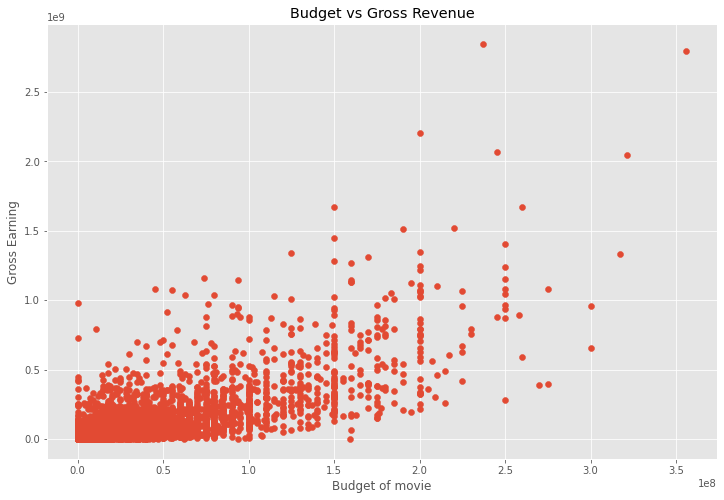

In [43]:
# scatter plot for gross revenue vs budget

# USING MATPLOTLIB
plt.scatter (x = df2['budget'], y = df2['gross'])
plt.title('Budget vs Gross Revenue')
plt.ylabel('Gross Earning')
plt.xlabel('Budget of movie')
plt.show()

In [51]:
#CHECKING ABOVE DATA 
df2.head() #SEEMS PERFECT

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<AxesSubplot: xlabel='budget', ylabel='gross'>

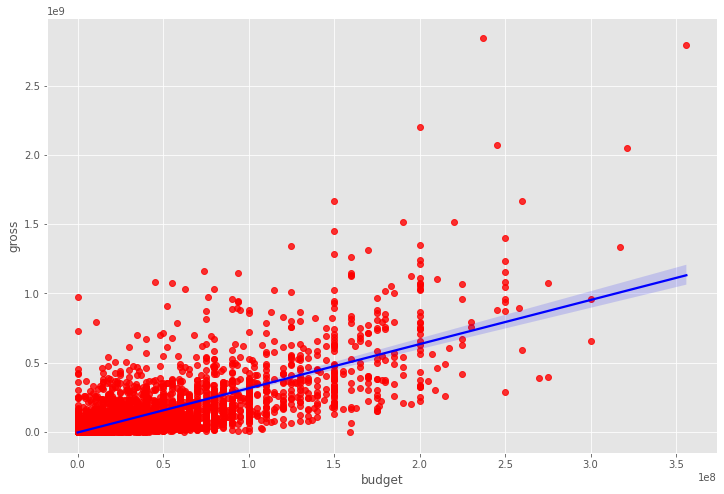

In [52]:
# plot budget vs gross using seaborn

#sns.regplot(x = 'budget', y = 'gross', data = df2)
sns.regplot(x = 'budget', y = 'gross', data = df2, scatter_kws={"color" : "red"}, line_kws={"color":"blue"}) # makes it look better

In [53]:
df2.corr()
#default person correlation
# also, kendall correlation
# also, spearmans rank correlation 

#df2.corr(method = 'kendall' / 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


In [54]:
# High correlation between budget and gross 
# is confirmed now B vs G = 0.750157 (pretty high)
# very hard to understand simpler way

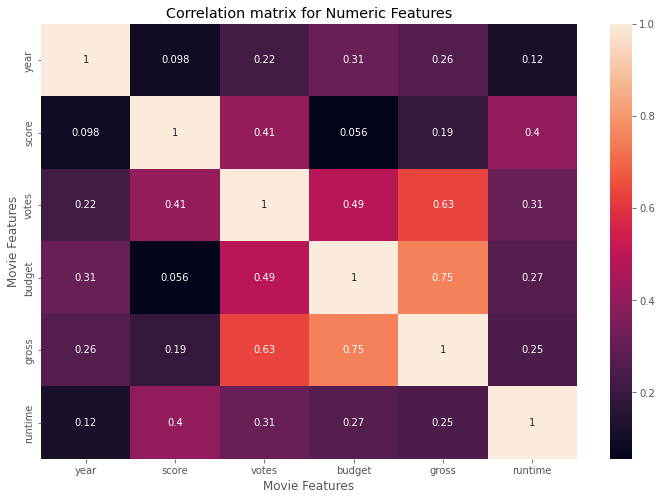

In [55]:
# plot correlation

correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

#black less correlation and light is more correlation

### Findings:

#### Votes VS Gross have high Correlation [0.63]
#### Budget VS Gross have high Correlation [0.75]

### CORRELATION [For all attributes we find]

In [42]:
# budget and gross high Corelation [Assumption]
# movie production house and gross high corelation [This dosn't make sense]
# we convert production house name into random unqiue int 

# because ->
# Correlations tell us, as one variable increases, what happens to the other? 
# So in the first question, as the budget increased, what happened to revenue? 
# It increased. But with country, company, or other categorical variables, correlations don't make sense. 
# The values for country and company are random, so the numbers that represent them going up doesn't tell us anything. 
# It's no wonder then, that the correlations weren't large. 


In [56]:
# Converting very data type of "object" into int into numbers as correlation deals with numbers

df3 = df2
df_numerized = df3

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'): #if ONLY data type is "object" ignores numeric data as year,votes,gross etc
        df_numerized[col_name] = df_numerized[col_name].astype('category') # convert it into "category" data type
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # assigns random codes (numbers to text)
        
df_numerized
#every text converted into numbers

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274,117,82,2797,55,0,0,1159,92.0
1614,1745,6,10,1989,55,5.2,1300,1033,1743,166,54,0,0,146,85.0
1606,2691,6,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2237,89.0
1601,3836,-1,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104.0


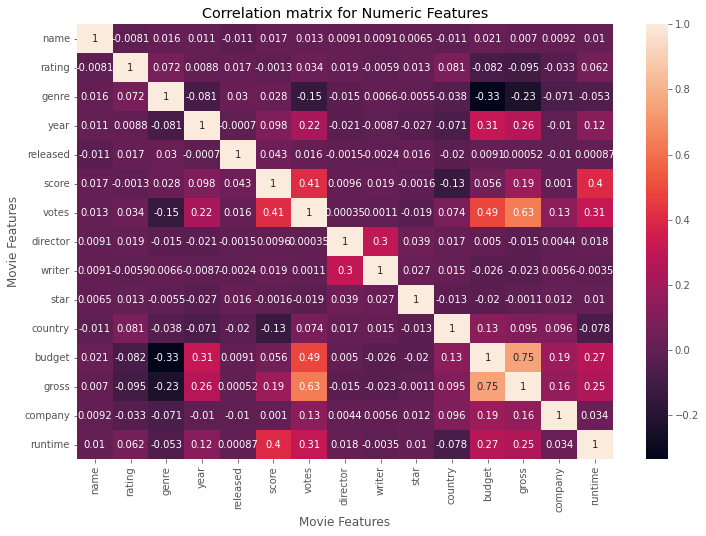

In [62]:
# plot correlation

correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

#black less correlation and light is more correlation

## Conclusion:

#### [Highest Correlation] Budget VS Gross i.e 0.75
#### [Second Correlation] Votes VS Gross i.e 0.63
#### [Some Correlation] Votes VS Budget i.e 0.49